<!-- dom:TITLE: Programmation Python  pour les mathématiques -->
# Python Programming for Mathematics
<!-- dom:AUTHOR: Julien Guillod at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licensed <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>


All chapters are available in
[HTML](https://python.guillod.org//) and [PDF](https://python.guillod.org//python.pdf).
This notebook is also executed on [mybinder](https://mybinder.org/v2/gh/juguillod/python/master?filepath=chap08.ipynb).






# 8 Probability and Statistics
<div id="ch:proba-stats"></div>

First, we study the statistics of the proportion of numbers having some values of their first digits. Then, we introduce two important probablity models.

**This chapter covers:**

* Statistics and probability

* Importing data

* Diagrams

* Optimisation by compilation

* Random steps

* Percolation





<!-- --- begin exercise --- -->

# Exercise 8.1: Benford's law

Benford's law predicts that statistically, in a given list of numbers the probability that a number starts with the digit one is greater than that of the digit nine. More precisely, Benford's law predicts that the probability of a number starting with the digit $d$ is:

$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$

where $\log_{10}$ designates the logarithm in base 10.

It is possible to verify that Benford's law is the only one that stays the same by changing of units, *i.e.* by multiplying the numbers in the list by a scalar the said probability is left unchanged.

**a)**
Écrire une fonction `firstdigit(n)` qui donné un nombre `n` retourne son premier chiffre et une fonction `occurrences(liste)` qui retourne le nombre d'occurrences des premiers chiffres de `liste`.
Write a function `fistdigit(n)` which, given a number `n`, returns its first digit, and another function `occurences(list_nums)` which returns the number of occurences of first digits of `list_nums`.

<!-- --- begin hint in exercise --- -->

**Hints:**
`occurence` should ignore the zeros in `list_nums`.

<!-- --- end hint in exercise --- -->



In [1]:
import numpy as np

def firstdigit(n):
    return int(str(n)[0])

def occurrences(list_nums):
    # This function returns a list of 10 elements in which each element's index corresponds to the digit. The values increment while we iterate
    # the list in the function's argument. If we see a zero, simply ignore it. The index 0 of the returned list is always zero
    
    results = [0]*10
    for x in list_nums:
        if x != 0:
            results[firstdigit(x)] += 1
    return results

l = np.random.randint(0,100,10)
print(l)
print(occurrences(l))

[27 61 79 98  7  4 51 73 41 70]
[0, 0, 1, 0, 2, 1, 1, 4, 0, 1]




**b)**
Verify the Benford's law with the sequence of numbers $(2^n)_ {n\in\mathbb{N}}$ by comparing empirical histograms with the results of Benford's law.

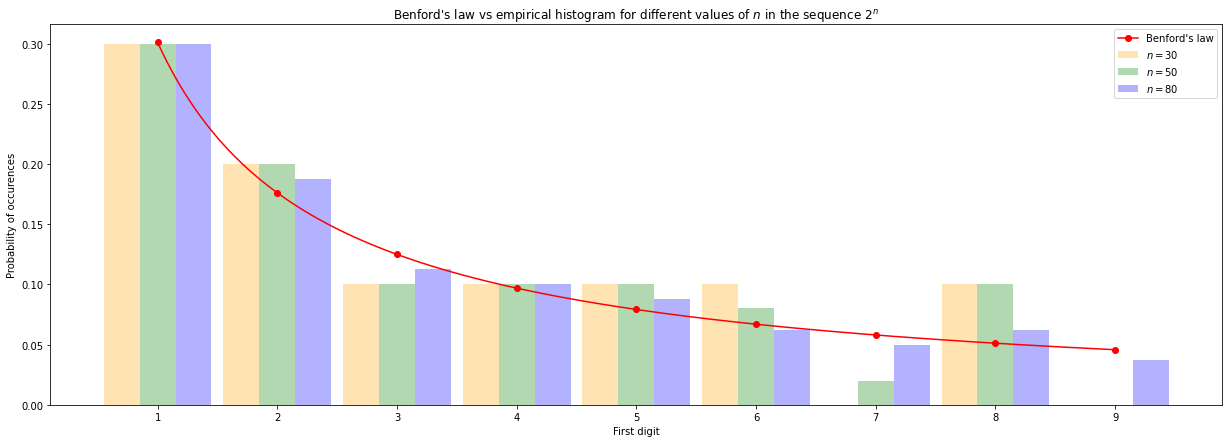

In [2]:
import matplotlib.pyplot as plt

def benford(n):
    return np.log10(1+1/n)

F = lambda n: 2**n

n_ = [30,50,80]
colors=['orange','green','blue']
x = np.arange(1,10)
x_plot = np.linspace(1,9,1001)
width = 0.3

fig, ax = plt.subplots(figsize=(21,7))

for i, n in enumerate(n_):
    list_nums = F(np.arange(n, dtype=object))
    ax.bar(x + (i-1)*width, np.array(occurrences(list_nums)[1:])/n, width, label=f"$n={n}$", color=colors[i], alpha=0.3)

ax.plot(x_plot, benford(x_plot), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for different values of $n$ in the sequence $2^n$")
plt.legend()
plt.show()

> The sequence $(2^n)_ {n\in\mathbb{N}}$ behaves like the prediction of Benford's law.

**c)**
Try this time with the sequence $(3n+1)_ {n\in\mathbb{N}}$.

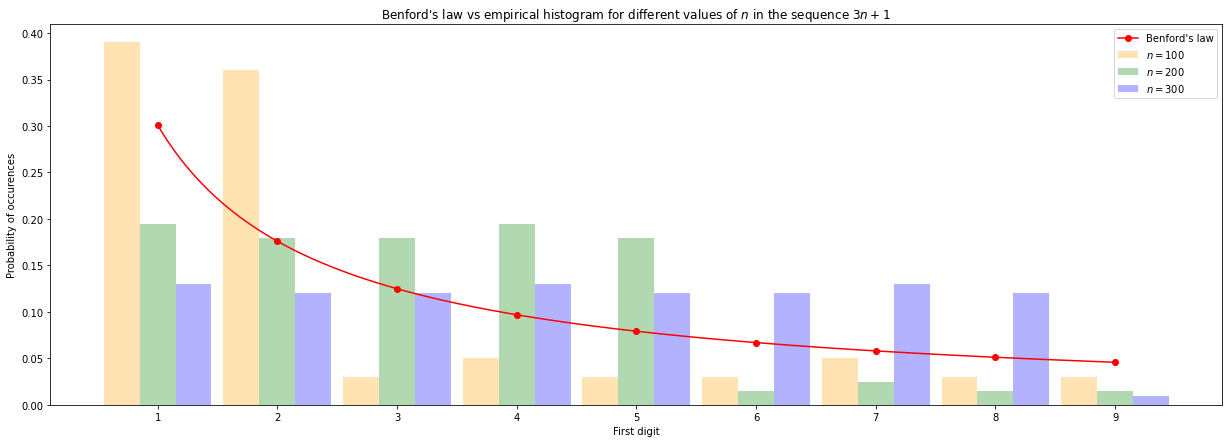

In [3]:
F = lambda n: 3*n+1

n_ = [100,200,300]
width = 0.3

fig, ax = plt.subplots(figsize=(21,7))

for i, n in enumerate(n_):
    list_nums = F(np.arange(n, dtype=object))
    ax.bar(x + (i-1)*width, np.array(occurrences(list_nums)[1:])/n, width, label=f"$n={n}$", color=colors[i], alpha=0.3)
ax.plot(x_plot, benford(x_plot), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for different values of $n$ in the sequence $3n+1$")
plt.legend()
plt.show()

> The sequence $(3n+1)_ {n\in\mathbb{N}}$ doesn't seem to behave according to Benford's law.


**d)**
Go to the website of INSEE (the National Institute of Statistics and Economics Studies) <https://insee.fr/fr/statistiques/3561090?sommaire=3561107> then download the file **POP1A.txt**. Import the data to obtain the population by postal codes, sexes, and ages.

<!-- --- begin hint in exercise --- -->

**Hints:**
The documentation on how to read a file is available [here](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files). Note that the TXT file is encoded with ISO-8859-1 format.

<!-- --- end hint in exercise --- -->



In [4]:
with open('BTT_TD_POP1A_2015.txt', 'r') as f:
    for _ in range(10):
        print(f.readline())

NIVGEO;CODGEO;LIBGEO;SEXE;AGEPYR10;NB

ARM;13201;Marseille 1er Arrondissement;1;00;862.93633739

ARM;13201;Marseille 1er Arrondissement;1;03;633.7286466

ARM;13201;Marseille 1er Arrondissement;1;06;1115.3709544

ARM;13201;Marseille 1er Arrondissement;1;11;1302.8362889

ARM;13201;Marseille 1er Arrondissement;1;18;2503.6467067

ARM;13201;Marseille 1er Arrondissement;1;25;4622.2283093

ARM;13201;Marseille 1er Arrondissement;1;40;4259.70682

ARM;13201;Marseille 1er Arrondissement;1;55;2192.8556468

ARM;13201;Marseille 1er Arrondissement;1;65;2435.1245446




**e)**
Determine if the population by communities, sexes, and ages follow Benford's law.

In [5]:
# For ease of use, we are going to use the pandas library to read the data into memory.

import pandas as pd

data = pd.read_csv('BTT_TD_POP1A_2015.txt', sep=';', encoding='latin_1')
data.head()

/Users/trungdam/opt/anaconda3/envs/ds/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,ARM,13201,Marseille 1er Arrondissement,1,0,862.936337
1,ARM,13201,Marseille 1er Arrondissement,1,3,633.728647
2,ARM,13201,Marseille 1er Arrondissement,1,6,1115.370954
3,ARM,13201,Marseille 1er Arrondissement,1,11,1302.836289
4,ARM,13201,Marseille 1er Arrondissement,1,18,2503.646707


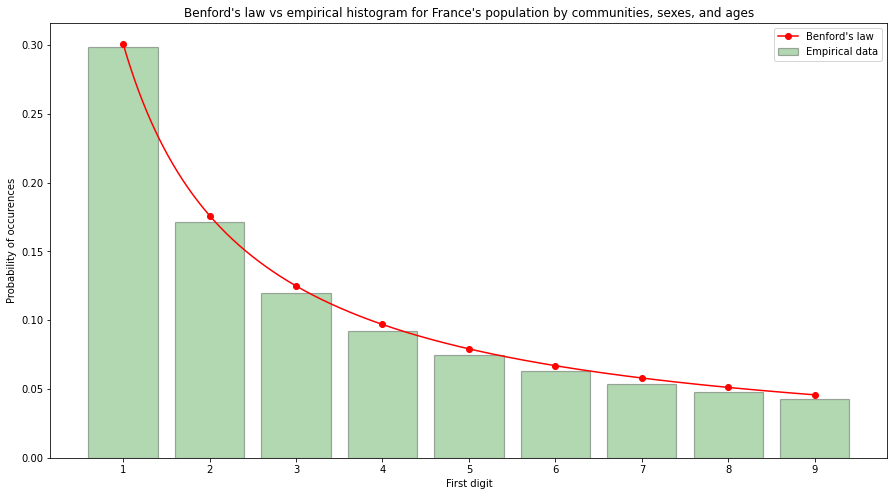

In [6]:
n = data.shape[0]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, np.array(occurrences(data['NB'])[1:])/n, label="Empirical data", color='green', edgecolor="black", linewidth=1.2, alpha=0.3)
ax.plot(x_plot, benford(x_plot), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for France's population by communities, sexes, and ages")
plt.legend()
plt.show()

> This set of data is a perfect example of Benford's law in real life


**f)**
Sum the data by communities to determine if the new data follow Benford's law.

In [7]:
grouped_by_community = data.groupby(['CODGEO']).sum()
grouped_by_community.head()

,SEXE,AGEPYR10,NB
CODGEO,,,
1001,30,606,767.0
1002,30,606,241.0
1004,30,606,14127.0
1005,30,606,1619.0
1006,30,606,109.0


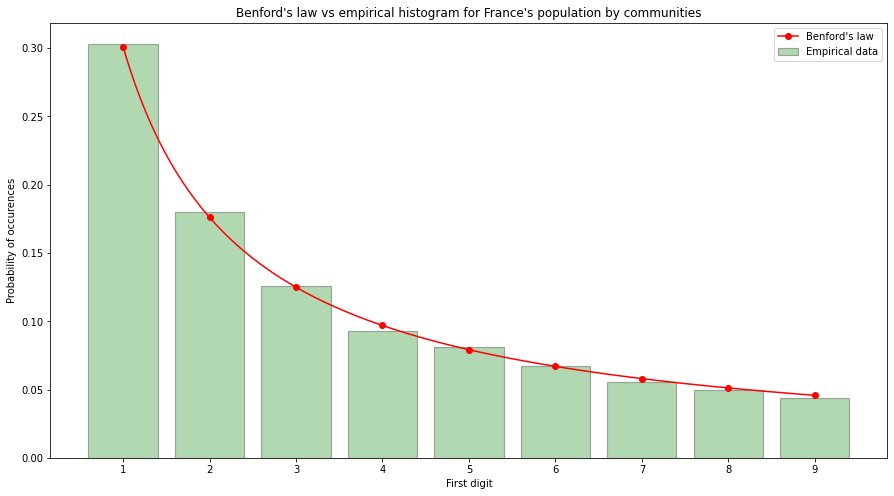

In [8]:
n = grouped_by_community.shape[0]

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x, np.array(occurrences(grouped_by_community['NB'])[1:])/n, label="Empirical data", color='green', edgecolor="black", linewidth=1.2, alpha=0.3)
ax.plot(x_plot, benford(x_plot), color='r', marker='o', markevery=125, label="Benford's law")
ax.set_xticks(x)
ax.set_xlabel("First digit")
ax.set_ylabel("Probability of occurences")
ax.set_title("Benford's law vs empirical histogram for France's population by communities")
plt.legend()
plt.show()


<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 8.2: Coin flip

The goal of this exercise is to simulate the evolution of a player's money in a coin flip (head or tail). In each turn, the player wins one franc if it's tail and lose one if it's head. The probability of having a tail is $p$, a head is $q$. If the coin is unbiased then $p=q=\frac{1}{2}$.

Mathematically, the sum $S_i$ of money the player has at time $i$ is given by a random step:

$$
S_{i}=\begin{cases}
0\,, & \text{if}\:S_i=0\,,\\ 
S_{i-1}+X_{i}\,, & \text{if}\:S_i\geq1\,,
\end{cases}
$$

where $(X_i)_ {i\geq1}$ are independent random variables of law $\mathbb{P}(X_i=1) = p$ and $\mathbb{P}(X_i=-1) = q$.


**a)**
Write a function `simulate(p,k,N)` generating a game of $N$ coin flips starting from $S_0=k$. Represent graphically multiple generations.

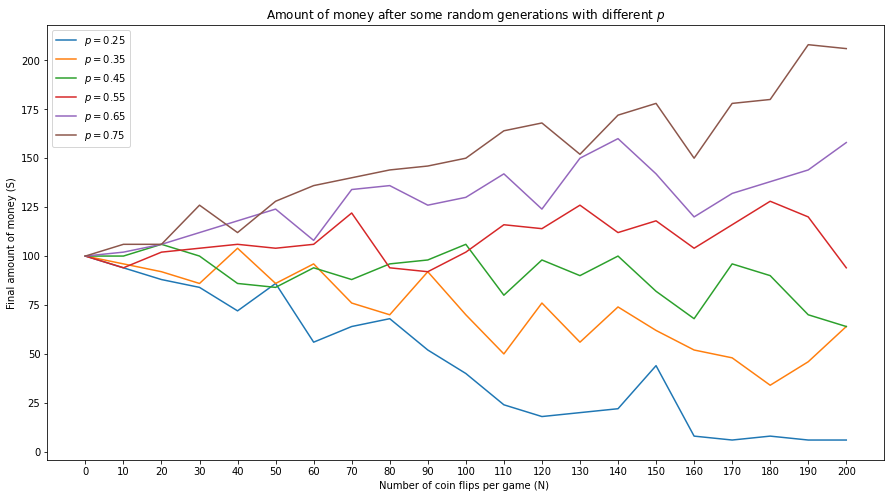

In [9]:
def simulate(p, k, N):
    if N == 0:
        return k
    game = np.random.rand(N)
    winning = game <= p
    for turn in winning:
        if turn:
            k += 1
        else:
            k -= 1
        if k == 0:  # the game ends when there is no money left
            return 0
    return k  # returns the final amount of money when N turns are done

k = 100
N = np.arange(0,201,10)
list_p = np.arange(2.5, 7.6, 1)/10

plt.figure(figsize=(15,8))
plt.title('Amount of money after some random generations with different $p$')
plt.xlabel('Number of coin flips per game (N) ')
plt.ylabel('Final amount of money (S)')
plt.xticks(N)


for p in list_p:
    plt.plot(N, [simulate(p,k,n) for n in N], label=f"$p={p}$")

plt.legend()
plt.show()


**b)**
Simulate a player having $k$ francs at the beginning who plays until he loses all his money or has $n>k$ francs.

In [10]:
def all_in(p, k, n):
    N = 0  # keep track of how many turns the player has done before the game ends
    while 0 < k < n:
        x = np.random.rand()
        if x <= p:
            k += 1
        else:
            k -= 1
        N += 1
    if k == n:
        return True, N  # win
    return False, N  # lose

# We are going to simulate 500 games for each p in {0.35,...,0.75}. To prevent a long wait, let's set the amount
# of money small enough, to k=50 and n=100 so that the player can finish his game. The results of each game is
# then stored inside a dictionary having the following structure:
# records = {p: {'win':[list of N returned from winning games], 'lose':[same list, losing games]}}
records = dict()

k, n = 50, 100
num_games = 500

for p in list_p:
    records[p] = {'win':[], 'lose':[]}
    for i in range(num_games):
        win, N = all_in(p, k, n)
        if win:
            records[p]['win'].append(N)
        else:
            records[p]['lose'].append(N)

In [11]:
# Let's analyse our simulation.

total_wins = np.sum([len(win) for win in [records[p]['win'] for p in list_p]])
print(f"Number of winning games {total_wins} or {round(total_wins * 100 / (num_games * len(list_p)), 2)}%", end="\n\n")
for p in list_p:
    print(f"For p = {p}:")
    if len(records[p]['win']) == 0:
        print(f"- No winning game. The quickest loss is after {np.min(records[p]['lose'])} turns and the longest after {np.max(records[p]['lose'])} turns.")
        print(f"- Mean loss after {np.mean(records[p]['lose'])} turns.")
        print(f"- Median:         {np.median(records[p]['lose'])}.")
    elif len(records[p]['lose']) == 0:
        print(f"- Won every game. The quickest win is after {np.min(records[p]['win'])} turns and the longest after {np.max(records[p]['win'])} turns.")
        print(f"- Mean win after {np.mean(records[p]['win'])} turns.")
        print(f"- Median:        {np.median(records[p]['win'])}.")
    else:
        print(f"- Number of wins: {len(records[p]['win'])} or {round(len(records[p]['win'])*100/(num_games), 4)}%")
        print(f"- The quickest win after {np.min(records[p]['win'])} turns.")
        print(f"- The longest win after  {np.max(records[p]['win'])} turns.")
        print(f"- Mean win after {np.mean(records[p]['win'])} turns.")
        print(f"- Median:        {np.median(records[p]['win'])}.")
        print(f"- The quickest loss after {np.min(records[p]['lose'])} turns.")
        print(f"- The longest loss after  {np.max(records[p]['lose'])} turns.")
        print(f"- Mean loss after {np.mean(records[p]['lose'])} turns.")
        print(f"- Median:         {np.median(records[p]['lose'])}.")
    print("")

Number of winning games 1500 or 50.0%

For p = 0.25:
- No winning game. The quickest loss is after 60 turns and the longest after 178 turns.
- Mean loss after 100.68 turns.
- Median:         98.0.

For p = 0.35:
- No winning game. The quickest loss is after 88 turns and the longest after 370 turns.
- Mean loss after 168.14 turns.
- Median:         162.0.

For p = 0.45:
- No winning game. The quickest loss is after 128 turns and the longest after 1664 turns.
- Mean loss after 498.5 turns.
- Median:         465.0.

For p = 0.55:
- Won every game. The quickest win is after 120 turns and the longest after 1366 turns.
- Mean win after 494.864 turns.
- Median:        447.0.

For p = 0.65:
- Won every game. The quickest win is after 76 turns and the longest after 322 turns.
- Mean win after 168.44 turns.
- Median:        164.0.

For p = 0.75:
- Won every game. The quickest win is after 62 turns and the longest after 172 turns.
- Mean win after 100.136 turns.
- Median:        98.0.




**c)**
Let $T$ be the time at which the game stops, *i.e.* when $S_T=0$ or $S_T=n$. Verify by the above simulation the theoretical results for the average time:

$$
\mathbb{E}(T)=\begin{cases}
k(n-k)\,, & \text{if}\:p=q\,,\\ 
\dfrac{n}{p-q}\dfrac{1-\rho^{k}}{1-\rho^{n}}-\dfrac{k}{p-q}\,, & \text{if}\:p\neq q\,,
\end{cases}
$$

and the exit point's probability:

$$
\mathbb{P}(S_{T}=0)=\begin{cases}
\dfrac{n-k}{n}\,, & \text{if}\:p=q\,,\\ 
\dfrac{\rho^{k}-\rho^{n}}{1-\rho^{n}}\,, & \text{if}\:p\neq q\,,
\end{cases}
$$

where $\rho = q/p$.

In [12]:
def ev_T(p, k, n):
    if p == 0.5:
        return k * (n - k)
    q = 1 - p
    rho = q / p
    return (n/(p-q)) * ((1-rho**k)/(1-rho**n)) - (k/(p-q))

def p_lose(p, k, n):
    if p == 0.5:
        return (n-k) / n
    q = 1 - p
    rho = q / p
    return (rho**k-rho**n) / (1-rho**n)

for p in list_p:
    print(f"For p = {p}:")
    print(f"Expected exit point N = {ev_T(p, k, n)}")
    if records[p]['lose']:
        print(f"Average loss after N =  {np.mean(records[p]['lose'])} turns.")
    else:
        print(f"Average win after N =   {np.mean(records[p]['win'])} turns.")
    print(f"Probability of losing =  {p_lose(p, k, n)}")
    print(f"Real losing rates =      {len(records[p]['lose'])/(num_games)}")
    print("")

For p = 0.25:
Expected exit point N = 100.0
Average loss after N =  100.68 turns.
Probability of losing =  1.0
Real losing rates =      1.0

For p = 0.35:
Expected exit point N = 166.66666666665458
Average loss after N =  168.14 turns.
Probability of losing =  0.9999999999999639
Real losing rates =      1.0

For p = 0.45:
Expected exit point N = 499.9560992289756
Average loss after N =  498.5 turns.
Probability of losing =  0.9999560992289758
Real losing rates =      1.0

For p = 0.55:
Expected exit point N = 499.9560992289753
Average win after N =   494.864 turns.
Probability of losing =  4.390077102426576e-05
Real losing rates =      0.0

For p = 0.65:
Expected exit point N = 166.66666666665458
Average win after N =   168.44 turns.
Probability of losing =  3.611888918443201e-14
Real losing rates =      0.0

For p = 0.75:
Expected exit point N = 100.0
Average win after N =   100.136 turns.
Probability of losing =  1.3929555690985346e-24
Real losing rates =      0.0



> Our simulation proves that the above mathematical formulas are very true


<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 8.3: Percolation

The goal of this exercise is to study a percolation model with a "drainage field" matrix. The field is modelised by a random boolean matrix determining the positions where water can flow into (the drains) and where it can't (the soil). A matrix is considered percolated if there exists a path so that water can flow from the top to the bottom line. In the examples below, the drains being colored in black have no water in it and those colored in blue does. The first matrix percolates while the second doesn't:
<!-- dom:FIGURE: [https://python.guillod.org/fig/percolation-def.png, width=800 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/percolation-def.png" width=800>

<!-- end figure -->


**a)**
Write a function `generate(n,p)` generating a bool matrix $n \times n$ so that each cell in the matrix has a probability $p$ for being `True` and $1-p$ for `False`.

<!-- --- begin hint in exercise --- -->

**Hints:**
The function `numpy.random.binomial` can be useful.

<!-- --- end hint in exercise --- -->



In [13]:
def generate(n,p):
    M = np.random.binomial(1, p, (n,n))
    return M.astype('uint8')

n, p = 10, 0.5

M = generate(n,p)
M

array([[1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]], dtype=uint8)


**b)**
Define a function `fill(isopen)` which, given a bool matrix, returns another bool matrix of cells filled with water.

<!-- --- begin hint in exercise --- -->

**Hints:**
Create a bool matrix `isfull` to store all cells that have been filled with water, then define a recursive function `flow(isopen,isfull,i,j)` making water flow into every possible cells starting from cell $(i,j)$.

<!-- --- end hint in exercise --- -->



In [14]:
def neighbors(i, j, n):
    # Returns a list of neighbors of the cell (i,j) in a n times n matrix
    list_neighbors = [(i+1,j), (i-1,j), (i,j+1), (i,j-1)]
    list_copy = list_neighbors.copy()
    
    for neigh in list_copy:
        if neigh[0] not in range(n) or neigh[1] not in range(n):
            list_neighbors.remove(neigh)
    return list_neighbors

def fill(isopen):
    # Create a zero matrix of cells that water will be flown into
    isfull = np.zeros_like(isopen)
    
    # Start water flow from every cell in the top line
    for j in range(len(isopen)):
        if isopen[0, j] and not isfull[0, j]:
            flow(isopen, isfull, 0, j)
    return isfull

def flow(isopen, isfull, i, j):
    n = len(isopen)
    isfull[i, j] = 1
    for a, b in neighbors(i, j, n):
        if isopen[a, b] and not isfull[a, b]:  # check if the neighbor is "fill-able" and has not yet been filled
            flow(isopen, isfull, a, b)
            
fill(M)

array([[1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [15]:
def fill_iter(M):
    # Iterative version of the above code. We create a queue which stores the possible cells where water can be flown
    # into, then iterate through this list until all is filled.

    n = len(M)
    filled = np.zeros_like(M)
    queue = [(0, j) for j in range(n) if M[0,j]]
    k = 0  # pointer
    while k < len(queue):
        i, j = queue[k]
        filled[i, j] = 1
        for a, b in neighbors(i, j, n):
            if M[a, b] and (a, b) not in queue:
                queue.append((a, b))
        k += 1
    return filled

fill_iter(M)

array([[1, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

> ### Let's compare the speed of the 2 funtions to choose the best approach for the next sections

In [16]:
n, p = 50, 0.8
M = generate(n,p)

In [17]:
%%timeit
fill(M)

8.56 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
fill_iter(M)

137 ms ± 368 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


> The recursive function takes much less time than the iterative one, probably due to memory efficiency of not having to memorise the large queue.


**c)**
Use Matplotlib to represent graphically some randomly generated percolation matrices.

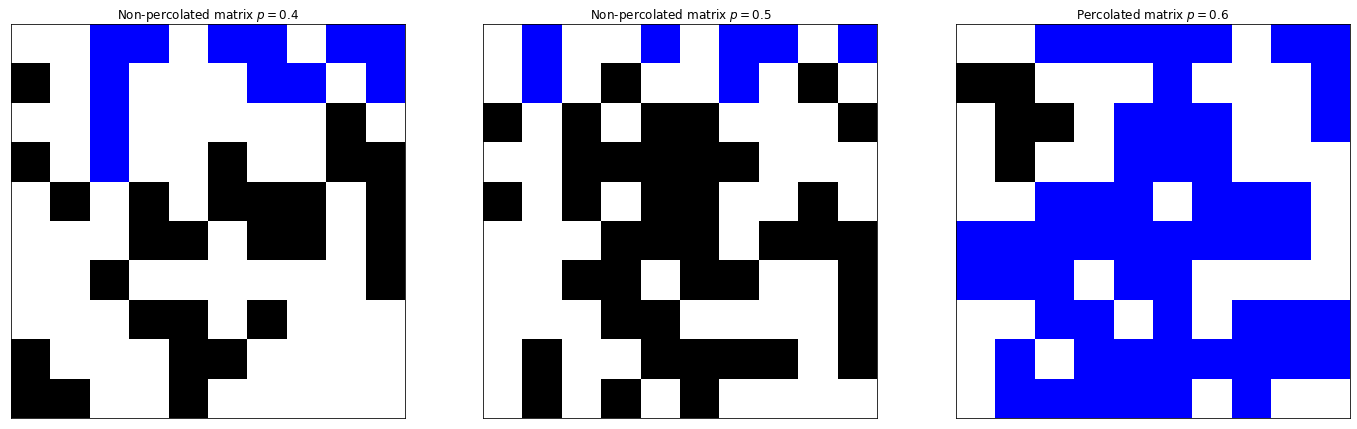

In [19]:
from matplotlib.colors import LinearSegmentedColormap

def percolated(isfull):
    return 1 in isfull[-1]

def draw_perco(M, p, cmap, ax):
    ax.imshow(M, cmap=cmap)
    perco_text = "Percolated" if percolated(filled) else "Non-percolated"
    ax.set_title(f"{perco_text} matrix $p={p}$")
    ax.set_xticks([])
    ax.set_yticks([])

n = 10
p_ = [0.4, 0.5, 0.6]

colors = [(1,1,1),(0,0,0),(0,0,1)]
cm = LinearSegmentedColormap.from_list("my_colors", colors, N=3)

fig, ax_ = plt.subplots(1, 3, figsize=(24,8))

for p, ax in zip(p_, ax_):
    M = generate(n, p)
    filled = fill(M)
    M[filled == 1] = 2  # Using the filled matrix as a mask, we change the filled cells in the original matrix to 2, indicating the presence of water
    
    draw_perco(M, p, cm, ax)
plt.show()


**d)**
Define a function `percolate(isopen)` determining if a bool matrix can be percolated or not.

In [20]:
def percolated(isopen):
    # By slightly tweaking the function above
    isfull = fill(isopen)
    return 1 in isfull[-1]


**e)**
<span style="color:red">!</span> Calculate the necessary time to determine if a $50 \times 50$ matrix is percolated with $p=0.9$. Read the documentation of the module `numba` to reduce the calculation time by compiling one of the above functions: <https://numba.pydata.org/>.
<!-- --- begin hint in exercise --- -->

**Hints:**
The most used function should be the recursive one, so this is the one that needs optimising by compiling.

<!-- --- end hint in exercise --- -->



In [21]:
M = generate(50, 0.9)

In [22]:
%%timeit
percolated(M)

9.92 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


> I have tried numerous ways to implement the `numba` module into my code but none seems to work. Plus, 9.92 ms seems to be a reasonably fast execution time, so I will skip using `numba` for this exercise.

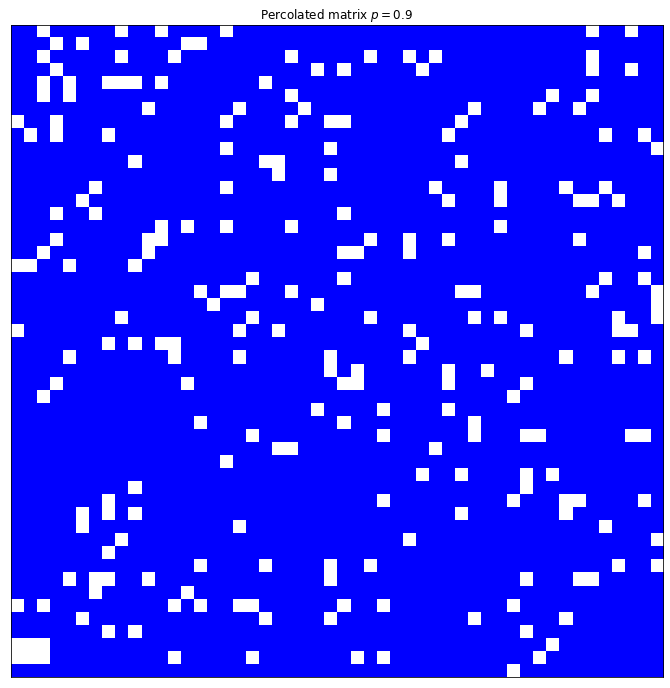

In [23]:
fig, ax = plt.subplots(figsize=(12,12))

M2 = M.copy()
filled = fill(M)
M2[filled == 1] = 2
draw_perco(M2, 0.9, cm, ax)

plt.show()

**f)**
By doing statistics, determine the probability that a random $n \times n$ bool matrix with probability $p$ is percolated. Study this probability in relations to $p$ and $n$.

<!-- --- begin hint in exercise --- -->

**Hints:**
Represent the graph of the percolation probability in relations to $p$ with different values of $n$.

<!-- --- end hint in exercise --- -->


<!-- --- begin answer of exercise --- -->
**Answer:**
When $n$ becomes very large, a matrix __almost surely__ is percolated if $p>0.592746$, else __amost never__.

<!-- --- end answer of exercise --- -->



In [24]:
import concurrent.futures  # Importing multi-threading functionality, because without it, this block of code can take hours
import time
import sys
sys.setrecursionlimit(70000)  # Not recommended doing this but I need this many recursion stacks for this block of code

def proba_perco(args):
    # Returns the rates of percolation after k tests
    n, p, k = args
    perco = 0
    for _ in range(k):
        if percolated(generate(n, p)):
            perco += 1
    return n, p, perco/k

n_ = [25,50,100,200,300]
p_ = np.arange(0.5,0.71,0.01)
k = 100

args = []
for n in n_:
    for p in p_:
        args.append((n, p, k))

records = {n:{p:0 for p in p_} for n in n_}

start = time.perf_counter()

# Pooling threads
with concurrent.futures.ThreadPoolExecutor() as exe:
    results = exe.map(proba_perco, args)
    for n, p, proba in results:
        records[n][p] = proba
    
finish = time.perf_counter()
print(f"Finished in {round((finish-start) / 60, 2)} minutes.")

Finished in 8.4 minutes.


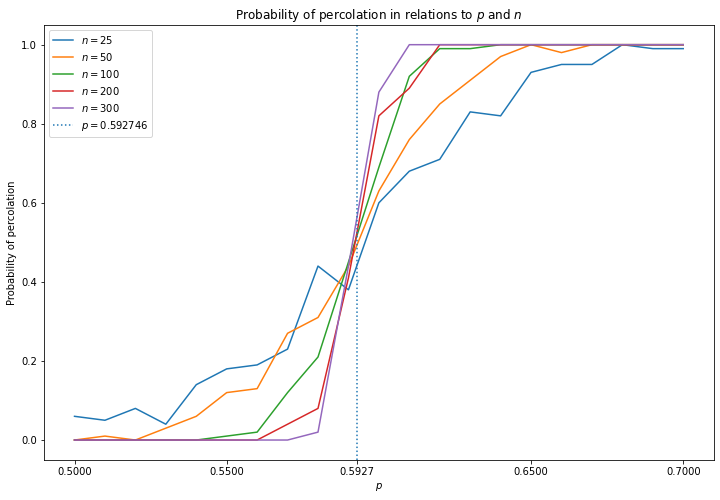

In [28]:
# Since multithreading can mess up the order of the elements added into our records, which make it hard to graph
# correctly, we will create a new records table from the previous one

records_ordered = {n:[records[n][p] for p in p_] for n in n_}

plt.figure(figsize=(12,8))
plt.title("Probability of percolation in relations to $p$ and $n$")
plt.xlabel("$p$")
plt.ylabel("Probability of percolation")
plt.xticks([0.50, 0.55, 0.592746, 0.65, 0.70])


for n in n_:
    plt.plot(p_, records_ordered[n], label=f"$n={n}$")
plt.axvline(x=0.592746, ls=':', label="$p=0.592746$")
    
plt.legend()
plt.show()